# Data Visualization and Preprocessing

### Importing Libraries

In [2]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install imblearn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

### Checking For Missing Values

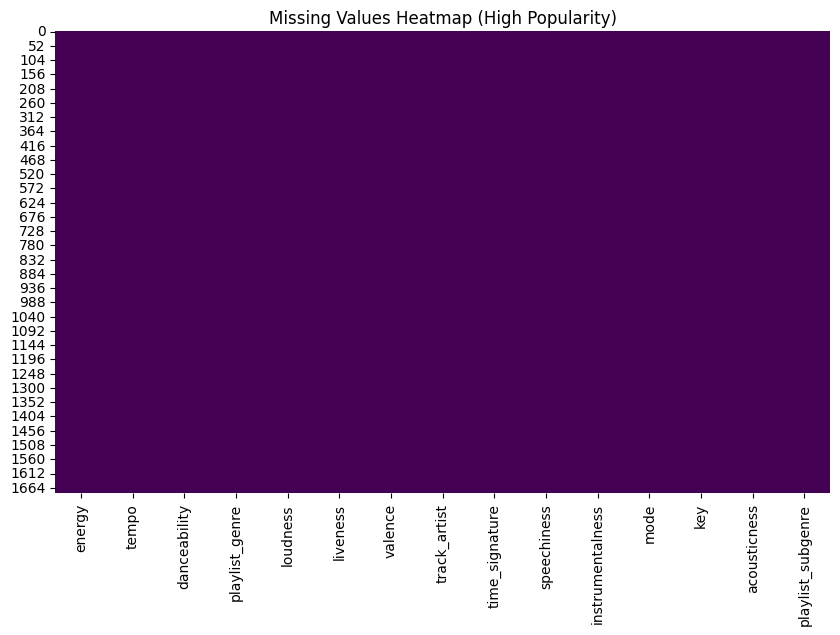

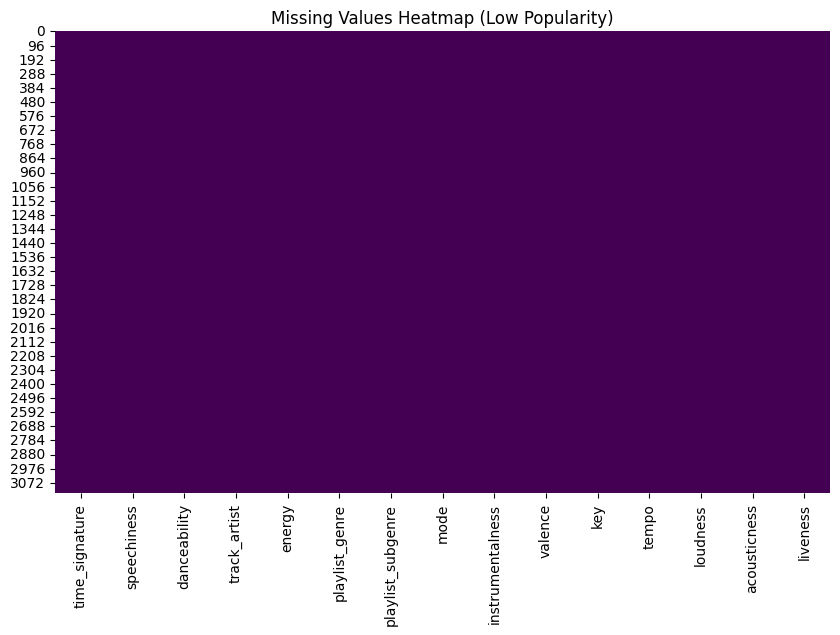

In [4]:
# Read data
high_df = pd.read_csv("../data/high_popularity_spotify_data.csv")
low_df = pd.read_csv("../data/low_popularity_spotify_data.csv")

# Remove unneeded features
high_df = high_df.drop(columns=[
    "track_href",
    "uri",
    "track_album_name",
    "playlist_name",
    "analysis_url",
    "track_id",
    "track_name",
    "track_album_release_date",
    "track_album_id",
    "duration_ms",
    "id",
    "playlist_id",
    "type",
    "track_popularity"
])

low_df = low_df.drop(columns=[
    "track_href",
    "uri",
    "track_album_name",
    "playlist_name",
    "analysis_url",
    "track_id",
    "track_name",
    "track_album_release_date",
    "track_album_id",
    "duration_ms",
    "id",
    "playlist_id",
    "type",
    "track_popularity"
])

# Plot high popularity data heatmap
plt.figure(figsize=(10,6))
sns.heatmap(high_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (High Popularity)")
plt.show()

# Plot low popularity data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(low_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (Low Popularity)")
plt.show()

### Checking For Duplicate Values

In [5]:
print(high_df.duplicated().sum())
print(low_df.duplicated().sum())

0
0


### Splitting Data

In [6]:
# Add a column to differentiate the classes
high_df['popularity_class'] = 'High'
low_df['popularity_class'] = 'Low'

# Combine the datasets
combined_df = pd.concat([high_df, low_df], ignore_index=True)

# Split the data into training (80%) and testing (20%) sets
X = combined_df.drop(columns=['popularity_class'])
y = combined_df['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in both sets
print(f"Training set distribution:\n{y_train.value_counts()}")
print(f"\nTest set distribution:\n{y_test.value_counts()}")

Training set distribution:
popularity_class
Low     2516
High    1348
Name: count, dtype: int64

Test set distribution:
popularity_class
Low     629
High    337
Name: count, dtype: int64


### Balancing Data By Undersampling

In [7]:
# Apply random undersampling to balance the training data
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Check the new class distribution in the resampled training set
print(f"Resampled training set distribution:\n{y_train_resampled.value_counts()}")

X_train_resampled

Resampled training set distribution:
popularity_class
High    1348
Low     1348
Name: count, dtype: int64


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,instrumentalness,mode,key,acousticness,playlist_subgenre
1286,0.655,129.890,0.558,electronic,-5.476,0.0854,0.390,"David Guetta, Alphaville, Ava Max",4.0,0.0379,0.000000,1.0,0.0,0.20800,techno
561,0.792,113.981,0.749,afrobeats,-4.621,0.0712,0.903,"Davido, YG Marley",4.0,0.0402,0.000016,1.0,5.0,0.30800,african
368,0.610,125.990,0.741,r&b,-7.340,0.5340,0.720,"Jhené Aiko, Swae Lee",4.0,0.0511,0.000000,0.0,6.0,0.31600,modern
1365,0.746,175.965,0.746,latin,-5.046,0.2740,0.733,"J Balvin, Farruko",4.0,0.1020,0.000000,0.0,5.0,0.15200,reggaeton
1033,0.937,132.067,0.727,pop,-2.871,0.0910,0.749,PSY,4.0,0.2860,0.000000,0.0,11.0,0.00417,throwback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,0.585,117.849,0.797,electronic,-5.854,0.1450,0.739,"LAUWE, Marcus Layton",4.0,0.0551,0.000002,0.0,0.0,0.45100,tropical
3804,0.731,85.183,0.543,world,-6.736,0.3140,0.636,"Rawayana, Jambene",4.0,0.1890,0.005230,1.0,7.0,0.25700,throat singing
3064,0.701,91.970,0.659,latin,-4.107,0.0866,0.623,Farruko,4.0,0.1640,0.000000,1.0,9.0,0.08820,reggaeton
4260,0.855,75.030,0.589,world,-5.196,0.0362,0.764,Duvie Shapiro,4.0,0.0487,0.000000,1.0,2.0,0.06490,jewish


### Encoding Categorical Data

In [8]:
def frequency_encode(df, columns):
    """
    Applies frequency encoding to specified categorical columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of categorical column names to encode.

    Returns:
        pd.DataFrame: DataFrame with frequency-encoded categorical columns.
    """
    df_encoded = df.copy()
    
    for col in columns:
        freq_map = df_encoded[col].value_counts().to_dict()
        df_encoded[col] = df_encoded[col].map(freq_map)
    
    return df_encoded


def keep_first_artist(df, column):
    """
    Modifies a DataFrame column to keep only the first artist from a comma-separated list.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column containing artist names.

    Returns:
        pd.DataFrame: A DataFrame with the column modified to keep only the first artist.
    """
    df = df.copy()
    df[column] = df[column].str.split(',').str[0].str.strip()
    return df


# Cleaning artists' names
X_train_resampled = keep_first_artist(X_train_resampled, 'track_artist')


categorical_cols = ['playlist_genre', 'track_artist', 'playlist_subgenre']

# Apply frequency encoding to specified categorical columns
X_train_resampled_encoded = frequency_encode(X_train_resampled, categorical_cols)

X_train_resampled_encoded

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,instrumentalness,mode,key,acousticness,playlist_subgenre
1286,0.655,129.890,0.558,309,-5.476,0.0854,0.390,7,4.0,0.0379,0.000000,1.0,0.0,0.20800,36
561,0.792,113.981,0.749,45,-4.621,0.0712,0.903,6,4.0,0.0402,0.000016,1.0,5.0,0.30800,25
368,0.610,125.990,0.741,41,-7.340,0.5340,0.720,2,4.0,0.0511,0.000000,0.0,6.0,0.31600,443
1365,0.746,175.965,0.746,252,-5.046,0.2740,0.733,8,4.0,0.1020,0.000000,0.0,5.0,0.15200,99
1033,0.937,132.067,0.727,362,-2.871,0.0910,0.749,1,4.0,0.2860,0.000000,0.0,11.0,0.00417,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,0.585,117.849,0.797,309,-5.854,0.1450,0.739,1,4.0,0.0551,0.000002,0.0,0.0,0.45100,30
3804,0.731,85.183,0.543,84,-6.736,0.3140,0.636,1,4.0,0.1890,0.005230,1.0,7.0,0.25700,15
3064,0.701,91.970,0.659,252,-4.107,0.0866,0.623,4,4.0,0.1640,0.000000,1.0,9.0,0.08820,99
4260,0.855,75.030,0.589,84,-5.196,0.0362,0.764,1,4.0,0.0487,0.000000,1.0,2.0,0.06490,34


### Standardizing Data